In [4]:
"""=============================================================================
   Ex4: PCA - sklearn
      a) Đọc dữ liệu từ Iris.xls vào dataframe
      b) Tìm correlation matrix, trực quan hóa   
      c) Dùng PCA giảm xuống còn 2 chiều (ban đầu 4 chiều, không kể cột lớp iris)
      d) Trực quan hóa dữ liệu sau khi giảm chiều
============================================================================="""

'=============================================================================\n   Ex4: PCA - sklearn\n      a) Đọc dữ liệu từ Iris.xls vào dataframe\n      b) Tìm correlation matrix, trực quan hóa   \n      c) Dùng PCA giảm xuống còn 2 chiều (ban đầu 4 chiều, không kể cột lớp iris)\n      d) Trực quan hóa dữ liệu sau khi giảm chiều\n============================================================================='

In [36]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.decomposition import PCA #By default, PCA() from sklearn will use SVD model to decompose covariance matrix

In [7]:
##------------------------------------------------------------------------------
print('\n*** a) Read data from Iris.xls into dataframe:')
##------------------------------------------------------------------------------

iris = pd.read_excel('/home/long/Documents/DataScience_hcmus/3.MathStatist_for_DS/Datasets/B3/Iris.xls')

iris


*** a) Read data from Iris.xls into dataframe:


,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



*** b) Find correlation/covariance matrix and visualize:

Correlation matrix of iris:
              sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000



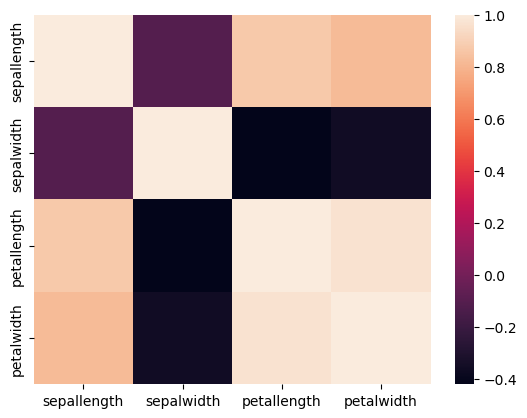

In [10]:
##------------------------------------------------------------------------------
print('\n*** b) Find correlation/covariance matrix and visualize:')

#Correlation and covariance both measure how 2 variables change to gether (tuong quan thuan hay nghich)
#But correlation is the normalized version of covariance
#Meaning, correlation must be between -1 and 1 (-1 < corr < 1)
# while covariance can be > 1 or < -1

##------------------------------------------------------------------------------
corr_iris = iris.iloc[:,:4].corr() #Generate a correlation matrix between dataframe variables (columns, features)

print('\nCorrelation matrix of iris:\n',corr_iris)
print()
sbn.heatmap(corr_iris,
            xticklabels=corr_iris.columns.values,
            yticklabels=corr_iris.columns.values);

In [43]:
##------------------------------------------------------------------------------
print('\n*** c) Reduce the data dimensions into k=2 with PCA:')
##------------------------------------------------------------------------------
pca_iris_2 = PCA(n_components=2).fit(iris.iloc[:,:4])

print('\npca_iris_2 n_components:',pca_iris_2.n_components_) #number of components
print('\npca_iris_2 components:\n', pca_iris_2.components_) #normalized eigenvectors of covariance matrix (by rows or Vt)
print('\npca_iris_2 components shape:', pca_iris_2.components_.shape)
print('\npca_iris_2 explained variance:\n', pca_iris_2.explained_variance_)#sqrt(eigenvalues) of covariance matrix
print('\npca_iris_2 explained variance ratio:\n', pca_iris_2.explained_variance_ratio_)
print('\npca_iris_2 explained variance shape:\n', pca_iris_2.explained_variance_.shape) #2x1 = 2

#Create reduced dataframe
iris_2 = pd.DataFrame(pca_iris_2.transform(iris.iloc[:,:4]))
iris_2.columns = ['Principal_component_1','Principal_component_2']
iris_2['Species'] = iris['iris']
print(f'\nDataframe iris_2 after reduce dimension:\n{iris_2}')


*** c) Reduce the data dimensions into k=2 with PCA:

pca_iris_2 n_components: 2

pca_iris_2 components:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

pca_iris_2 components shape: (2, 4)

pca_iris_2 explained variance:
 [4.22484077 0.24224357]

pca_iris_2 explained variance ratio:
 [0.92461621 0.05301557]

pca_iris_2 explained variance shape:
 (2,)

Dataframe iris_2 after reduce dimension:
     Principal_component_1  Principal_component_2         Species
0                -2.684207               0.326607     Iris-setosa
1                -2.715391              -0.169557     Iris-setosa
2                -2.889820              -0.137346     Iris-setosa
3                -2.746437              -0.311124     Iris-setosa
4                -2.728593               0.333925     Iris-setosa
..                     ...                    ...             ...
145               1.944017               0.187415  Iris-virginica
146               1


*** c) Visualize the reduced data with k=2:


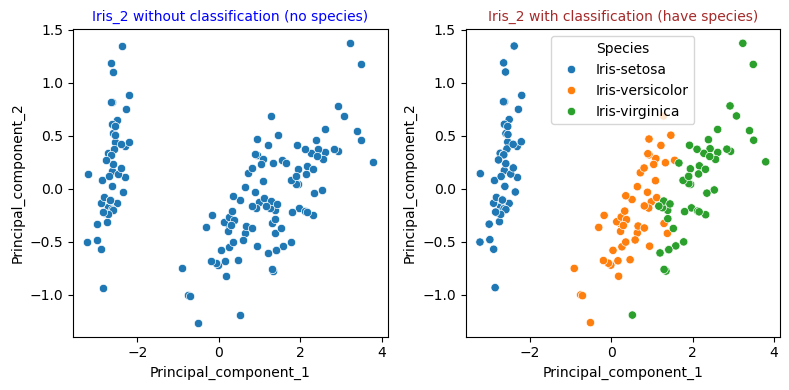

In [71]:
##------------------------------------------------------------------------------
print('\n*** c) Visualize the reduced data with k=2:')
##------------------------------------------------------------------------------
fig = plt.figure(figsize=(8,4))
grsp = GridSpec(nrows=1, ncols=2)

iris2_no_species = fig.add_subplot(grsp[0,0])
sbn.scatterplot(data=iris_2,x='Principal_component_1', y='Principal_component_2')
iris2_no_species.set_title('Iris_2 without classification (no species)',size=10, color='blue')

iris2_with_species = fig.add_subplot(grsp[0,1])
sbn.scatterplot(data=iris_2,x='Principal_component_1', y='Principal_component_2', hue='Species')
iris2_with_species.set_title('Iris_2 with classification (have species)',size=10, color='brown')

plt.tight_layout()

plt.show()